In [41]:
# Beginning to write functions that will be used for emcee run to sample SFH parameter space

# Generated corner plot for emcee sampling of parameters tage,tau and fburst,fage_burst

In [1]:
import sys
sys.path.append('/home/samantha/Documents/REU/scripts/') # Use the absolute path to the directory
from prospectFunctionsSFH import *

from matplotlib.pyplot import *
import emcee
import corner

In [2]:
run_params, obs, sps, wspec = init_prospect_generation()

In [4]:
theta = [.1, 1] # tage, tau

mcmc_model(theta, run_params, obs, sps)

np.float64(1.4594519538029804)

In [49]:
def log_likelihood(theta, B, Berr, params, obs, sps):
    Bpred = mcmc_model(theta, params, obs, sps)
    return -0.5 * (B - Bpred)**2 / Berr**2

In [51]:
def log_probability(theta,B,Berr,params,obs,sps):
    lp = log_prior(theta)

    if not np.isfinite(lp):
        return -np.inf

    return lp + log_likelihood(theta,B,Berr,params,obs,sps)

In [55]:
log_probability(theta,B,Berr,run_params,obs,sps)

np.float64(-3.2732727197294516)

In [54]:
B = 6.9
Berr = 2.1
data = (B,Berr,run_params,obs,sps)

In [70]:
nwalkers = 128
niter = 100
initial = np.array([0.3, 0.1])

ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

In [71]:
def main(p0,nwalkers,niter,ndim,log_probability,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

In [72]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,log_probability,data)

Running burn-in...


/home/samantha/anaconda3/envs/reu/lib/python3.13/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


Running production...


In [ ]:
# def plotter(sampler,age=age,T=T):
#     plt.ion()
#     plt.plot(age,T,label='Change in T')
#     samples = sampler.flatchain
#     for theta in samples[np.random.randint(len(samples), size=100)]:
#         plt.plot(age, model(theta, age), color="r", alpha=0.1)
#     plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     plt.xlabel('Years ago')
#     plt.ylabel(r'$\Delta$ T (degrees)')
#     plt.legend()
#     plt.show()

In [75]:
samples=sampler.flatchain
samples

array([[ 1.7594241 ,  0.40436485],
       [ 0.41477208,  0.18253022],
       [ 1.48583139,  1.68878821],
       ...,
       [ 0.92722332, 18.2156131 ],
       [ 1.23774212,  1.13427974],
       [ 1.28239038,  7.18321882]], shape=(12800, 2))

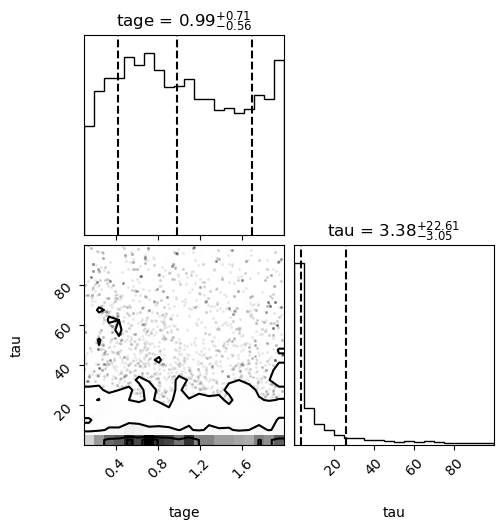

In [79]:
labels = ['tage','tau']
fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])

In [80]:
nwalkers = 240
niter = 1024
initial = np.array([0.3, 0.1])

ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

In [81]:
def main(p0,nwalkers,niter,ndim,log_probability,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

In [82]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,log_probability,data)

Running burn-in...


/home/samantha/anaconda3/envs/reu/lib/python3.13/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


Running production...


In [83]:
samples=sampler.flatchain
samples

array([[ 0.12002799,  1.76095549],
       [ 0.18717112,  0.14234432],
       [ 0.22317272,  0.42335459],
       ...,
       [ 0.93719172, 24.5322291 ],
       [ 1.17080937, 59.68526311],
       [ 1.23984109, 12.09543118]], shape=(245760, 2))

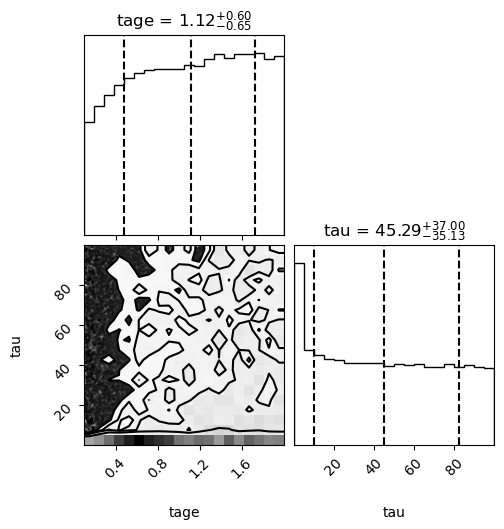

In [84]:
labels = ['tage','tau']
fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])

In [4]:
run_params

{'zred': 3.548,
 'mass': 100000000.0,
 'logzsol': 0.0,
 'dust2': 0.0,
 'sfh': 1,
 'imf_type': 2,
 'dust_type': 0,
 'tau': 0.05,
 'tage': 1.0,
 'fburst': 0.0,
 'fage_burst': 0.0,
 'tburst': 0.0,
 'const': 0.0,
 'sf_start': 0.0,
 'sf_trunc': 0.0}

In [3]:
B = 6.9
Berr = 2.1
data = (B,Berr,run_params,obs,sps)

In [5]:
nwalkers = 240
niter = 1024
initial = np.array([0.9, 0.5]) # fburst, fage_burst

ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

In [7]:
# def main(p0,nwalkers,niter,ndim,log_probability,data):
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=data)

print("Running burn-in...")
p0, _, _ = sampler.run_mcmc(p0, 100)
sampler.reset()

print("Running production...")
pos, prob, state = sampler.run_mcmc(p0, niter)

    # return sampler, pos, prob, state

Running burn-in...
Running production...


In [8]:
samples=sampler.flatchain

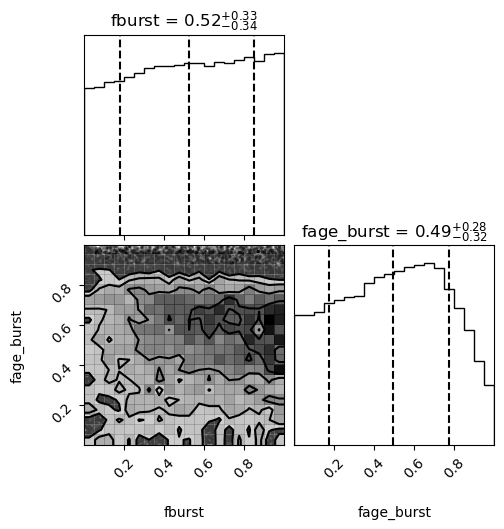

In [9]:
labels = ['fburst','fage_burst']
fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])

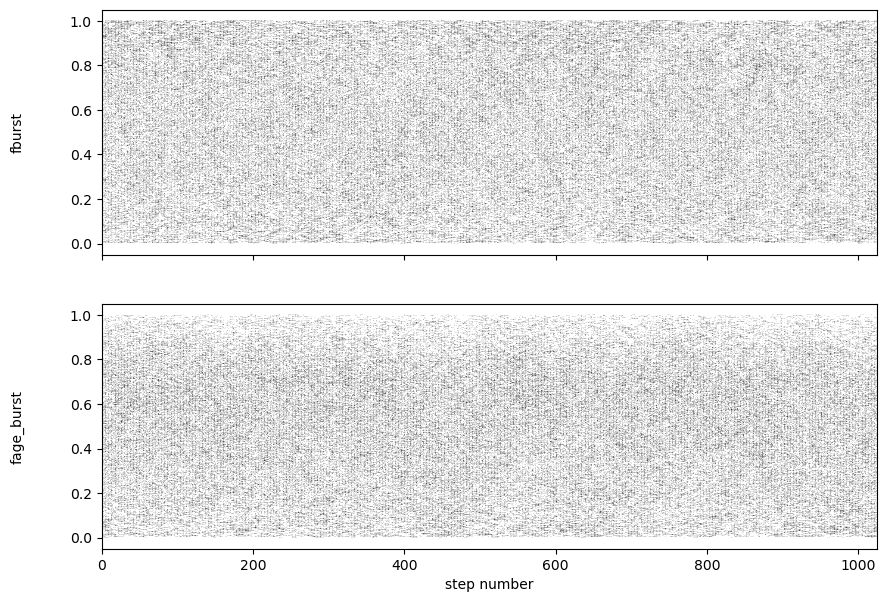

In [40]:
fig, axes = subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["fburst", "fage_burst"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", lw=0, marker=',', alpha=0.1)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [22]:
def plot_sfh(params):
    from prospect.plotting.sfh import parametric_sfr
    fig, ax = subplots()
    times = np.linspace(0,params['tage'],10000)
    sfrs = parametric_sfr(times=times,**params)
    ax.plot(times,sfrs,label=f'tage={params['tage']:.2f} Gyrs')

    ax.invert_xaxis()
    ax.set_xlabel('lookback time')
    ax.set_ylabel('sfr')
    
    return

In [27]:
from prospect.models.transforms import tburst_from_fage

run_params['fburst'] = 0.52
run_params['fage_burst'] = 0.49
run_params['tburst'] = tburst_from_fage(tage=run_params['tage'], fage_burst=run_params['fage_burst'])

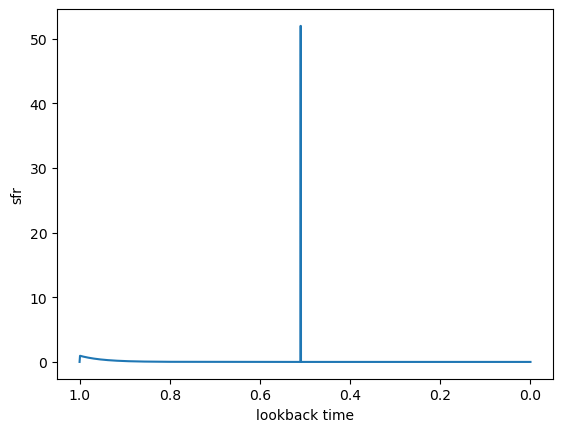

In [28]:
plot_sfh(run_params)

In [32]:
print(f'The burst occured {run_params['tage'] - run_params['tburst']} Gyrs before observation.')

The burst occured 0.51 Gyrs before observation.
